In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
data= pd.read_csv("bank.csv")


In [4]:
numerical_feature = [feature for feature in data.columns if data[feature].dtypes != 'O']
discrete_feature = [feature for feature in numerical_feature if len(data[feature].unique())<25]
continous_feature = [feature for feature in numerical_feature if feature not in discrete_feature]
categorical_feature = [feature for feature in data.columns if feature not in numerical_feature]
print("Numerical Features count {}".format(len(numerical_feature)))
print("Discrete Features count {}".format(len(discrete_feature)))
print("Continous Features count {}".format(len(continous_feature)))
print("Categorical Features count {}".format(len(categorical_feature)))

Numerical Features count 7
Discrete Features count 0
Continous Features count 7
Categorical Features count 10


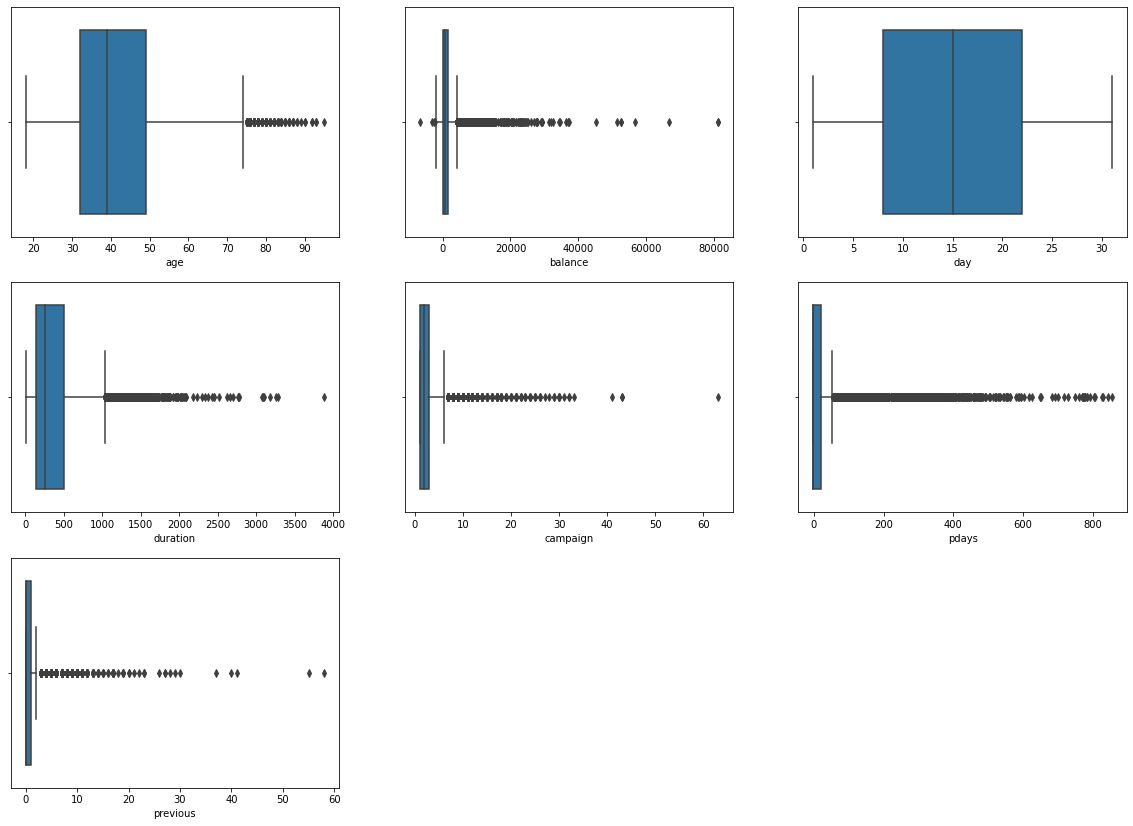

In [5]:
#boxplot on numerical features to find outliers

plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for numerical_feature in numerical_feature:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(data[numerical_feature])
    plt.xlabel(numerical_feature)
    plotnumber+=1
plt.show()

In [6]:
IQR = data.age.quantile(0.75)-data.age.quantile(0.25)
lower_limit = data.age.quantile(0.25)-(IQR*1.5)
upper_limit = data.age.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)

6.5 74.5


In [7]:
data.loc[data['age']>=74.5,'age']=74.5
data.loc[data['age']<=6.5,'age']=6.5

In [8]:
IQR = data.balance.quantile(0.75)-data.balance.quantile(0.25)
lower_limit = data.balance.quantile(0.25)-(IQR*1.5)
upper_limit = data.balance.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)

-2257.0 4087.0


In [9]:
data.loc[data['balance']>=4087,'balance']=4087
data.loc[data['balance']<=-2257,'balance']=-2257

In [10]:
IQR = data.campaign.quantile(0.75)-data.campaign.quantile(0.25)
lower_limit = data.campaign.quantile(0.25)-(IQR*1.5)
upper_limit = data.campaign.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)

-2.0 6.0


In [11]:
data.loc[data['campaign']>=6,'campaign']=6
data.loc[data['campaign']<=-2,'campaign']=-2

In [12]:
IQR = data.duration.quantile(0.75)-data.duration.quantile(0.25)
lower_limit = data.duration.quantile(0.25)-(IQR*1.5)
upper_limit = data.duration.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)

-399.0 1033.0


In [13]:
data.loc[data['duration']>=1033,'duration']=1033
data.loc[data['duration']<=-399,'duration']=-399

In [14]:
IQR = data.pdays.quantile(0.75)-data.pdays.quantile(0.25)
lower_limit = data.pdays.quantile(0.25)-(IQR*1.5)
upper_limit = data.pdays.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)

-33.625 53.375


In [15]:
data.loc[data['pdays']>=53.375,'pdays']=53.375
data.loc[data['pdays']<=-33.625,'pdays']=-33.625

In [16]:
IQR = data.previous.quantile(0.75)-data.previous.quantile(0.25)
lower_limit = data.previous.quantile(0.25)-(IQR*1.5)
upper_limit = data.previous.quantile(0.75)+(IQR*1.5)
print(lower_limit, upper_limit)

-1.5 2.5


In [17]:
data.loc[data['previous']>=2.5,'previous']=2.5
data.loc[data['previous']<=-1.5,'previous']=-1.5

In [21]:
data.groupby(['deposit','age'],sort=True)['age'].count()


deposit  age 
no       18.0      1
         19.0      2
         20.0      5
         21.0      8
         22.0      8
                ... 
yes      71.0     25
         72.0     24
         73.0     24
         74.0     13
         74.5    132
Name: age, Length: 116, dtype: int64

In [22]:
data["loan"] = pd.get_dummies(data["loan"], drop_first = True)
data["housing"] = pd.get_dummies(data["housing"], drop_first = True)
data["deposit"] = pd.get_dummies(data["deposit"], drop_first = True)

data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,1,0,unknown,5,may,1033,1,-1.0,0.0,unknown,1
1,56.0,admin.,married,secondary,no,45,0,0,unknown,5,may,1033,1,-1.0,0.0,unknown,1
2,41.0,technician,married,secondary,no,1270,1,0,unknown,5,may,1033,1,-1.0,0.0,unknown,1
3,55.0,services,married,secondary,no,2476,1,0,unknown,5,may,579,1,-1.0,0.0,unknown,1
4,54.0,admin.,married,tertiary,no,184,0,0,unknown,5,may,673,2,-1.0,0.0,unknown,1


In [23]:
data.drop(['default','pdays'], axis = 1, inplace = True)

In [24]:
data.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59.0,admin.,married,secondary,2343,1,0,unknown,5,may,1033,1,0.0,unknown,1
1,56.0,admin.,married,secondary,45,0,0,unknown,5,may,1033,1,0.0,unknown,1
2,41.0,technician,married,secondary,1270,1,0,unknown,5,may,1033,1,0.0,unknown,1
3,55.0,services,married,secondary,2476,1,0,unknown,5,may,579,1,0.0,unknown,1
4,54.0,admin.,married,tertiary,184,0,0,unknown,5,may,673,2,0.0,unknown,1


In [25]:
job = {'student':0, 'retired':1, 'unemployed':2, 'management':3, 'unknown':4, 'admin.':5,
       'self-employed':6, 'technician':7, 'services':8, 'housemaid':9, 'entrepreneur':10,
       'blue-collar':11}
marital = {'single':0, 'divorced':1, 'married':2}
education = {'tertiary':0, 'unknown':1, 'secondary':2, 'primary':3}
contact = {'cellular':0, 'telephone':1, 'unknown':2}
month = {'dec':12, 'mar':3, 'sep':9, 'oct':10, 'apr':4, 'feb':2, 'aug':8, 'jun':6, 'nov':11, 'jul':7,
       'jan':1, 'may':5}
poutcome = {'success':0, 'other':1, 'failure':2, 'unknown':3}

data["job"] = data["job"].map(job)
data["marital"] = data["marital"].map(marital)
data["education"] = data["education"].map(education)
data["contact"] = data["contact"].map(contact)
data["month"] = data["month"].map(month)
data["poutcome"] = data["poutcome"].map(poutcome)

In [26]:
data["job"] = data["job"].fillna(data["job"].value_counts().index[0])
data["marital"] = data["marital"].fillna(data["marital"].value_counts().index[0])
data["education"] = data["education"].fillna(data["education"].value_counts().index[0])
data["contact"] = data["contact"].fillna(data["contact"].value_counts().index[0])
data["month"] = data["month"].fillna(data["month"].value_counts().index[0])
data["poutcome"] = data["poutcome"].fillna(data["poutcome"].value_counts().index[0])

In [27]:
data.head()

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,previous,poutcome,deposit
0,59.0,5,2,2,2343,1,0,2,5,5,1033,1,0.0,3,1
1,56.0,5,2,2,45,0,0,2,5,5,1033,1,0.0,3,1
2,41.0,7,2,2,1270,1,0,2,5,5,1033,1,0.0,3,1
3,55.0,8,2,2,2476,1,0,2,5,5,579,1,0.0,3,1
4,54.0,5,2,0,184,0,0,2,5,5,673,2,0.0,3,1


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import metrics

In [31]:
X = data.drop(["deposit"], axis=1)
y = data["deposit"]

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2,random_state = 0)


In [33]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [34]:
y_pred1 = rf.predict(X_test)
print(confusion_matrix(y_test,y_pred1))
print(accuracy_score(y_test,y_pred1))
print(classification_report(y_test,y_pred1))

[[998 207]
 [145 883]]
0.8423645320197044
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1205
           1       0.81      0.86      0.83      1028

    accuracy                           0.84      2233
   macro avg       0.84      0.84      0.84      2233
weighted avg       0.84      0.84      0.84      2233



0.8435825919886335

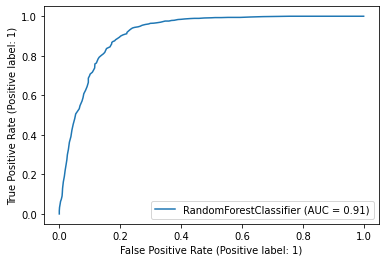

In [35]:
metrics.plot_roc_curve(rf, X_test, y_test)
metrics.roc_auc_score(y_test, y_pred1, average=None)

In [36]:
import pickle


In [37]:
file = open('random_forest_classifier_model.pkl', 'wb')

# dump information to that file

pickle.dump(rf, file)